In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read data frame
df = pd.read_csv('/Users/chrisgabriel/Desktop/adult.data.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [88]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [89]:
def calculate_demographic_data(print_data=True):
    # Read data from file
    df = pd.read_csv('/Users/chrisgabriel/Desktop/adult.data.csv')

    # How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
    race_count = df['race'].value_counts()

    # What is the average age of men?
    average_age_men = df[df['sex'] == 'Male']['age'].mean()

    # What is the percentage of people who have a Bachelor's degree?
    percentage_bachelors = (df['education']=='Bachelors').mean()*100

    # What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
    # What percentage of people without advanced education make more than 50K?

    # with and without `Bachelors`, `Masters`, or `Doctorate`
    q1 = df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])
    q2 = df['salary'] == '>50K'

    higher_education_rich = round((q1 & q2).sum() / q1.sum() * 100, 1)
    lower_education_rich = round((~q1 & q2).sum() / (~q1).sum() * 100, 1)

    # percentage with salary >50K
    higher_education_rich = round((df['salary'] == '>50K').mean() * 100,2)
    lower_education_rich = round((df['salary'] == '<=50K').mean() * 100,2)

    # What is the minimum number of hours a person works per week (hours-per-week feature)?
    min_work_hours = df['hours-per-week'].min()

    # What percentage of the people who work the minimum number of hours per week have a salary of >50K?
    num_min_workers = df[df['hours-per-week'] == min_work_hours].count().iloc[0]

    rich_percentage = round(((df.loc[(df['hours-per-week'] == min_work_hours) & (df['salary'] == '>50K')].count() / df.count()) * 100),2).iloc[0]

    # What country has the highest percentage of people that earn >50K?
    highest_earning_country = df[df['salary'] == '>50K']['native-country'].value_counts().head(1)


    highest_earning_country_percentage = round((highest_earning_country.iloc[0]/(df.count())) * 100,2).iloc[0]

    # Identify the most popular occupation for those who earn >50K in India.
    top_IN_occupation = df[(df['native-country'] == 'India') & (df['salary'] == '>50K')]['occupation'].value_counts().head(1)

    # DO NOT MODIFY BELOW THIS LINE

    if print_data:
        print("Number of each race:\n", race_count)
        print("Average age of men:", average_age_men)
        print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")
        print(f"Percentage with higher education that earn >50K: {higher_education_rich}%")
        print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")
        print(f"Min work time: {min_work_hours} hours/week")
        print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")
        print("Country with highest percentage of rich:", highest_earning_country)
        print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")
        print("Top occupations in India:", top_IN_occupation)

    return {
        'race_count': race_count,
        'average_age_men': average_age_men,
        'percentage_bachelors': percentage_bachelors,
        'higher_education_rich': higher_education_rich,
        'lower_education_rich': lower_education_rich,
        'min_work_hours': min_work_hours,
        'rich_percentage': rich_percentage,
        'highest_earning_country': highest_earning_country,
        'highest_earning_country_percentage': highest_earning_country_percentage,
        'top_IN_occupation': top_IN_occupation
    }

print(calculate_demographic_data())

Number of each race:
 White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64
Average age of men: 39.43354749885268
Percentage with Bachelors degrees: 16.44605509658794%
Percentage with higher education that earn >50K: 24.08%
Percentage without higher education that earn >50K: 75.92%
Min work time: 1 hours/week
Percentage of rich among those who work fewest hours: 0.01%
Country with highest percentage of rich: United-States    7171
Name: native-country, dtype: int64
Highest percentage of rich people in country: 22.02%
Top occupations in India: Prof-specialty    25
Name: occupation, dtype: int64
{'race_count': White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64, 'average_age_men': 39.43354749885268, 'percentage_bachelors': 16.44605509658794, 'higher_education_rich': 24

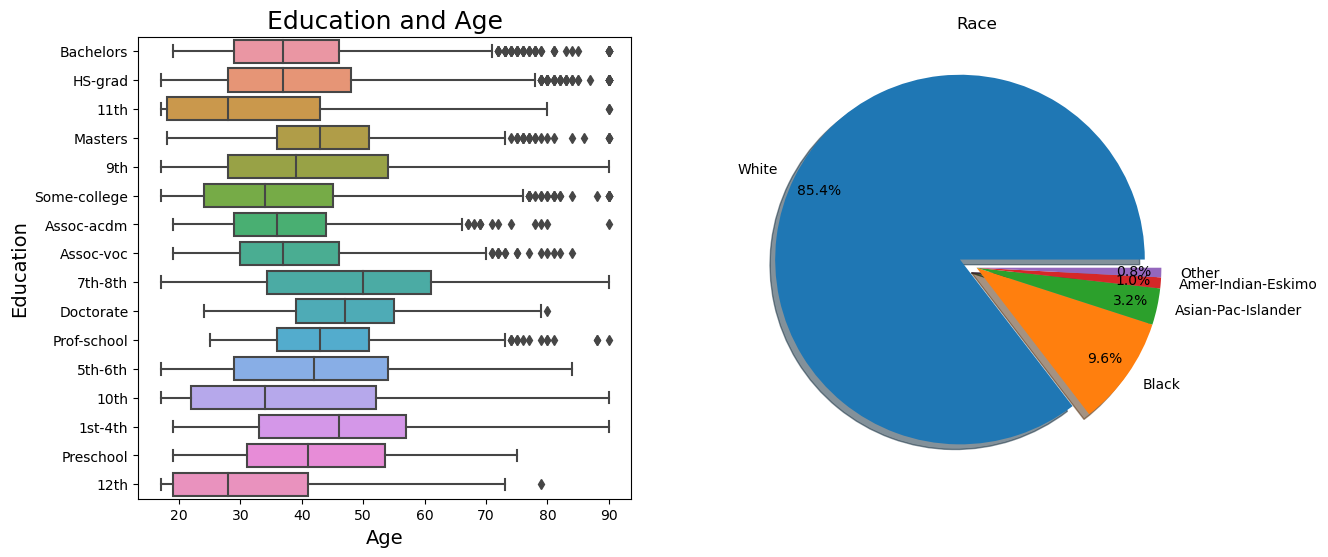

In [103]:
# some graphs because why not?
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="age", y="education")
plt.title("Education and Age", fontsize=18)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Education", fontsize=14)

plt.subplot(1, 2, 2)
df['race'].value_counts().plot(kind='pie', title='Race', ylabel='', autopct='%1.1f%%', explode=(0.1, 0, 0, 0, 0), pctdistance=0.85, shadow=True)
plt.show()

Text(0.5, 0, 'Age')

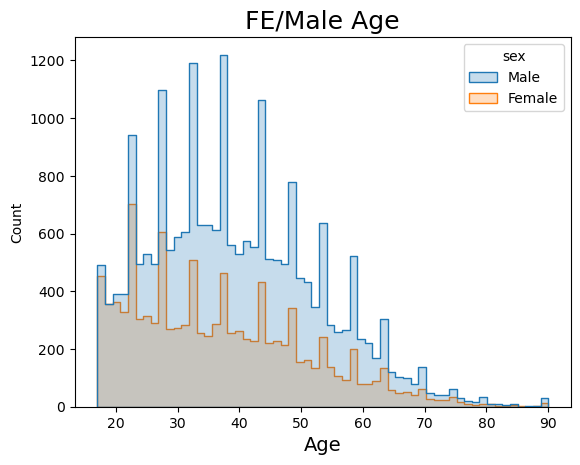

In [105]:
# another one
sns.histplot(df, x="age", hue="sex", element="step")
plt.title("FE/Male Age", fontsize=18)
plt.xlabel("Age", fontsize=14)